# Assignment 4
## Part 1 of 2
# Questions
1. You are provided with the following URL: [http://eecs.qmul.ac.uk/~emmanouilb/income_table.html](http://eecs.qmul.ac.uk/~emmanouilb/income_table.html). This webpage includes a table on individuals' income and shopping habits - the same that was used in the Week 3 lab.
  1. Inspect the HTML code of the above URL, and provide a short report on the various tags present in the code. What is the function of each unique tag present in the HTML code?
  2. Using Beautiful Soup, scrape the table and convert it into a pandas dataframe. Perform data cleaning when necessary to remove extra characters (no need to handle missing values). In the report include the code that was used to scrape and convert the table and provide evidence that the table has been successfully scraped and converted (e.g. by displaying the contents of the dataframe).
  
2. The list of the various MSc programmes offered by the School of EECS is provided at the following URL: [http://eecs.qmul.ac.uk/postgraduate/programmes/](http://eecs.qmul.ac.uk/postgraduate/programmes/). Perform web scraping on the table present in the above URL and convert it into a pandas dataframe that would include one row for each programme of study as shown in the webpage. The dataframe should include the following 5 columns: name of postgraduate degree programme (e.g. Advanced Electronic and Electrical Engineering), programme code for part-time study (e.g. H60C), programme code for full-time study (e.g. H60A), URL for part-time study programme details, and URL for full-time study programme details. Perform data cleaning to remove unecessary characters when needed. In the report include the code that was used to scrape, convert and clean the table and provide evidence that the table has been successfully scraped (e.g. by displaying the contents of the dataframe).

3. Consider the graph in the figure below as displaying the links for a group of 5 webpages.
  1. Which of the 5 nodes would you consider hubs and which would you consider authorities?
  2. Assume that this graph is to be used as input to the PageRank algorithm. Add transitions with a uniform probability distribution in the case of dead-end nodes (do not consider cases of dead-end components). Then, calculate the transition probabilities $p_{ji}$ for all 5 nodes in the graph (where $i$ and $j$ take values between 1 to 5).
  3. Using the modified graph of question 3B, derive the PageRank $\pi(i)$ for all nodes, where $i=\{1,...,5\}$ corresponds to the node index. Assume that the teleportation probability is set to $\alpha$.

### Question 1
#### Part A
Explanations of tags on the http://eecs.qmul.ac.uk/~emmanouilb/income_table.html webpage

* "html" signifies the start of the code
* "body" is the start of the visible code
* "p" for the initial paragraph
* "h1" is the most important heading
* "table" defines a section of the html where the table code starts which is further split into "thead" and "tbody"
    * "tr" defines a new row of the table
    * "th" defines a new cell in the header row
    * "td" defines a new cell in a non-header row

* To close a section and move to the next, </"name of tag"> is done

#### Part B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
# Setup
url = "http://eecs.qmul.ac.uk/~emmanouilb/income_table.html"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
rows = soup.find_all('tr')

# Header
header_list = []
col_labels = soup.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text() 
header_list.append(cleantext_header)

# Table
table_list = []
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()
    table_list.append(row_cleantext)

# Make dataframe header
df_header = pd.DataFrame(header_list)
df_header2 = df_header[0].str.split(',', expand=True)

# Make rest of table
df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)

# Join together
frames = [df_header2, df_table2]
df = pd.concat(frames)

# Remove Unnecessary Character
df[0] = df[0].str.strip('[')
df[3] = df[3].str.strip(']')

# Make header row
df2 = df.rename(columns=df.iloc[0]) 
df3 = df2.drop(df2.index[0])
df3

,Region,Age,Income,Online Shopper
1,India,49,86400,No
2,Brazil,32,57600,Yes
3,USA,35,64800,No
4,Brazil,43,73200,No
5,USA,45,,Yes
6,India,40,69600,Yes
7,Brazil,,62400,No
8,India,53,94800,Yes
9,USA,55,99600,No
10,India,42,80400,Yes


### Question 2

#### DataFrame creation
First with no links

In [4]:
# Setup
url = "http://eecs.qmul.ac.uk/postgraduate/programmes/"
html = urlopen(url)
post = BeautifulSoup(html, 'lxml')
rows = post.find_all('tr')

# Header
header_list = []
col_labels = post.find_all('th')
col_str = str(col_labels)
cleantext_header = BeautifulSoup(col_str, "lxml").get_text() 
header_list.append(cleantext_header)

# Table
table_list = []
for row in rows:
    row_td = row.find_all('td')
    row_cells = str(row_td)
    row_cleantext = BeautifulSoup(row_cells, "lxml").get_text()
    table_list.append(row_cleantext)
    
# Make dataframe header
df_header = pd.DataFrame(header_list)
df_header2 = df_header[0].str.split(',', expand=True)

# Make rest of table
df_table = pd.DataFrame(table_list)
df_table2 = df_table[0].str.split(',', expand=True)

# Join together
frames = [df_header2, df_table2]
df = pd.concat(frames)

# Remove Unnecessary Character
df[0] = df[0].str.strip('[')
df[2] = df[2].str.strip(']')

# Make header row
df2 = df.rename(columns=df.iloc[0]) 
df3 = df2.drop(df2.index[0])


# Text table made, next section is to add urls
df3

,Postgraduate degree programmes,Part-time(2 year),Full-time(1 year)
1,Advanced Electronic and Electrical Engineering,H60C,H60A
2,Artificial Intelligence,I4U2,I4U1
3,Big Data Science,H6J6,H6J7
4,Computer Games,,I4U4
5,Computer Science,G4U2,G4U1
6,Computer Science by Research,G4Q2,G4Q1
7,Computing and Information Systems,G5U6,G5U5
8,Data Science and Artificial Intelligence by Co...,,I4U5
9,Electronic Engineering by Research,H6T6,H6T5
10,Internet of Things (Data),I1T2,I1T0


#### Extracting and adding URLs

In [5]:
# finds all table data
linktree = post.find_all("td")


# of the table data, get every link
links = []
for linkleaf in linktree:
    if linkleaf.find('a') == None:
        links.append('None')
    else:
        url = linkleaf.find("a").get('href')
        links.append(url)

# td referes to ever cell, so every third is a new row
# there is no link for the first column (name of the course), so I
# delete every 3rd element starting with 0
del links[0::3]
# links now contains all the links of column 2 and 3 of the table

## Splitting the links of each column
part_time = links[::2] # every second element
full_time = links[1::2] #every second element starting with the second in the list

df4 = df3.assign(Part_TimeURL = part_time)
df5 = df4.assign(Full_TimeURL = full_time)
df6 = df5.rename(columns={"Part_TimeURL": "Part Time URL",
                         "Full_TimeURL": "Full Time URL"})
df7 = df6.set_index('Postgraduate degree programmes')
df7

,Part-time(2 year),Full-time(1 year),Part Time URL,Full Time URL
Postgraduate degree programmes,,,,
Advanced Electronic and Electrical Engineering,H60C,H60A,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
Artificial Intelligence,I4U2,I4U1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
Big Data Science,H6J6,H6J7,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
Computer Games,,I4U4,None,https://www.qmul.ac.uk/postgraduate/taught/cou...
Computer Science,G4U2,G4U1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
Computer Science by Research,G4Q2,G4Q1,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
Computing and Information Systems,G5U6,G5U5,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...
Data Science and Artificial Intelligence by Conversion,,I4U5,None,https://www.qmul.ac.uk/postgraduate/taught/cou...
Electronic Engineering by Research,H6T6,H6T5,https://www.qmul.ac.uk/postgraduate/taught/cou...,https://www.qmul.ac.uk/postgraduate/taught/cou...


### Question 3
#### A
3,4 and 5 are hubs because they have many links out to other nodes

1 and 2 are authorities because they have many links coming to them

#### B
![Nodes](Nodes_HITS.png)

Transition probability for outgoing transitions from node 1 or 2 is 1/5

Transition probability for outgoing transitions from node 3, 4 or 5 is 1/2

#### C
$\pi(1) = \alpha/5 + (1 - \alpha). (\pi(1)/5 + \pi(2)/5 + \pi(3)/2 + \pi(4)/2 + \pi(5)/2) $

$\pi(2) = \alpha/5 + (1 - \alpha). (\pi(1)/5 + \pi(2)/5 + \pi(3)/2 + \pi(4)/2 + \pi(5)/2) $

$\pi(3) = \alpha/5 + (1 - \alpha). (\pi(1)/5 + \pi(2)/5)$

$\pi(4) = \alpha/5 + (1 - \alpha). (\pi(1)/5 + \pi(2)/5)$

$\pi(5) = \alpha/5 + (1 - \alpha). (\pi(1)/5 + \pi(2)/5)$



## Part 2 of 2
## Questions
1. Consider the following sentences related to data mining theory, and assume that each of the below sentences corresponds to a different document:
    * Data refers to characteristics that are collected through observation.
    * A dataset can be viewed as a collection of objects.
    * Data objects are described by a number of attributes.
    * An attribute is a characteristic or feature of an object.

  1. Construct and display the document-term matrix for the above documents. Remove all stop words (here consider as stop words: articles, prepositions, conjunctions, pronouns, and common verbs) and punctuation marks; convert any plural nouns/adjectives to their singular form; and convert verbs to the present tense and first person singular form, before you construct the matrix.
  2. Using the above constructed document-term matrix, calculate the inverse document frequency $\mathit{idf}(w)$ for all words $w$ you have identified from question 1(a).

2. Consider the following timeseries $y = \{0.1, 0.15, 0.2, 0.2, 0.3, 0.4, 0.25, 0.6, 0.5\}$. Perform timeseries binning using $k=3$ values per bin, and show the resulting timeseries after binning.



4. Using the daily births dataset from this lab tutorial, smooth the timeseries using trailing moving average smoothing and a window size that corresponds to one week; then replace any NaN values with zeros. Perform timeseries forecasting using the smoothed dataset in order to predict daily births for the first 5 days of 1960, using the models below. Show your forecasting results.
    * AR model with $p=2$
    * ARMA model with $p=2$ and $q=2$

5. Using a similar process used in section 1 of this lab notebook, perform document clustering using k-means on the following wikipedia articles: anomaly detection, cluster analysis, k-means clustering, data mining, data warehouse, association rule learning. As with section 1, use the elbow metric to find an appropriate number of clusters. Discuss and display the document clustering results.
### Question 1
#### A

##### Removal of punctuation
* data refers to characteristics that are collected through observation
* a dataset can be viewed as a collection of objects
* data objects are described by a number of attributes
* an attribute is a characteristic or feature of an object

##### Removal of stop words (including common verbs)
* data characteristics collected observation
* dataset collection objects
* data objects number attributes
* attribute characteristic feature object

##### Singular form, present tense
* data characteristic collect observation
* dataset collection object
* data object number attribute
* attribute characteristic feature object

##### Matrix

 DOCUMENT | data | characteristic | collect | observation | dataset | collection | object | number| attribute | feature |   
 :-------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
 Doc1 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |
 Doc2 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 0 | 0 | 0 |
 Doc3 | 1 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 0 |
 Doc4 | 0 | 1 | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 1 |

#### B
Inverse document frequency $\mathit{idf}(w)$: the logarithm of the fraction of the total number of documents divided by the number of documents that contain word $w$.

$ log(4/w) $

 DOCUMENT | data | characteristic | collect | observation | dataset | collection | object | number| attribute | feature |   
 :-------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
 $ 4/w $ | 2 | 2 | 4 | 4 | 4 | 4 | 1.3 | 4 | 2 | 4 |
 $\mathit{idf}(w)$ | 0.3 | 0.3 | 0.6 | 0.6 | 0.6 | 0.6 | 0.1 | 0.6 | 0.3 | 0.6 |


### Question 2
Bin size = 3

List length = 9

$9 \div 3 = 3 $

3 bins

 BIN | Datapoints| Average |
 :--:|:---------:|:-------:|
  1  | 0.1, 0.15, 0.2 | 0.15
  2  | 0.2,0.3,0.4 | 0.3
  3  | 0.25, 0.6, 0.5 | 0.45
  
New series = $ \{0.15,0.3,0.45\} $

### Question 3

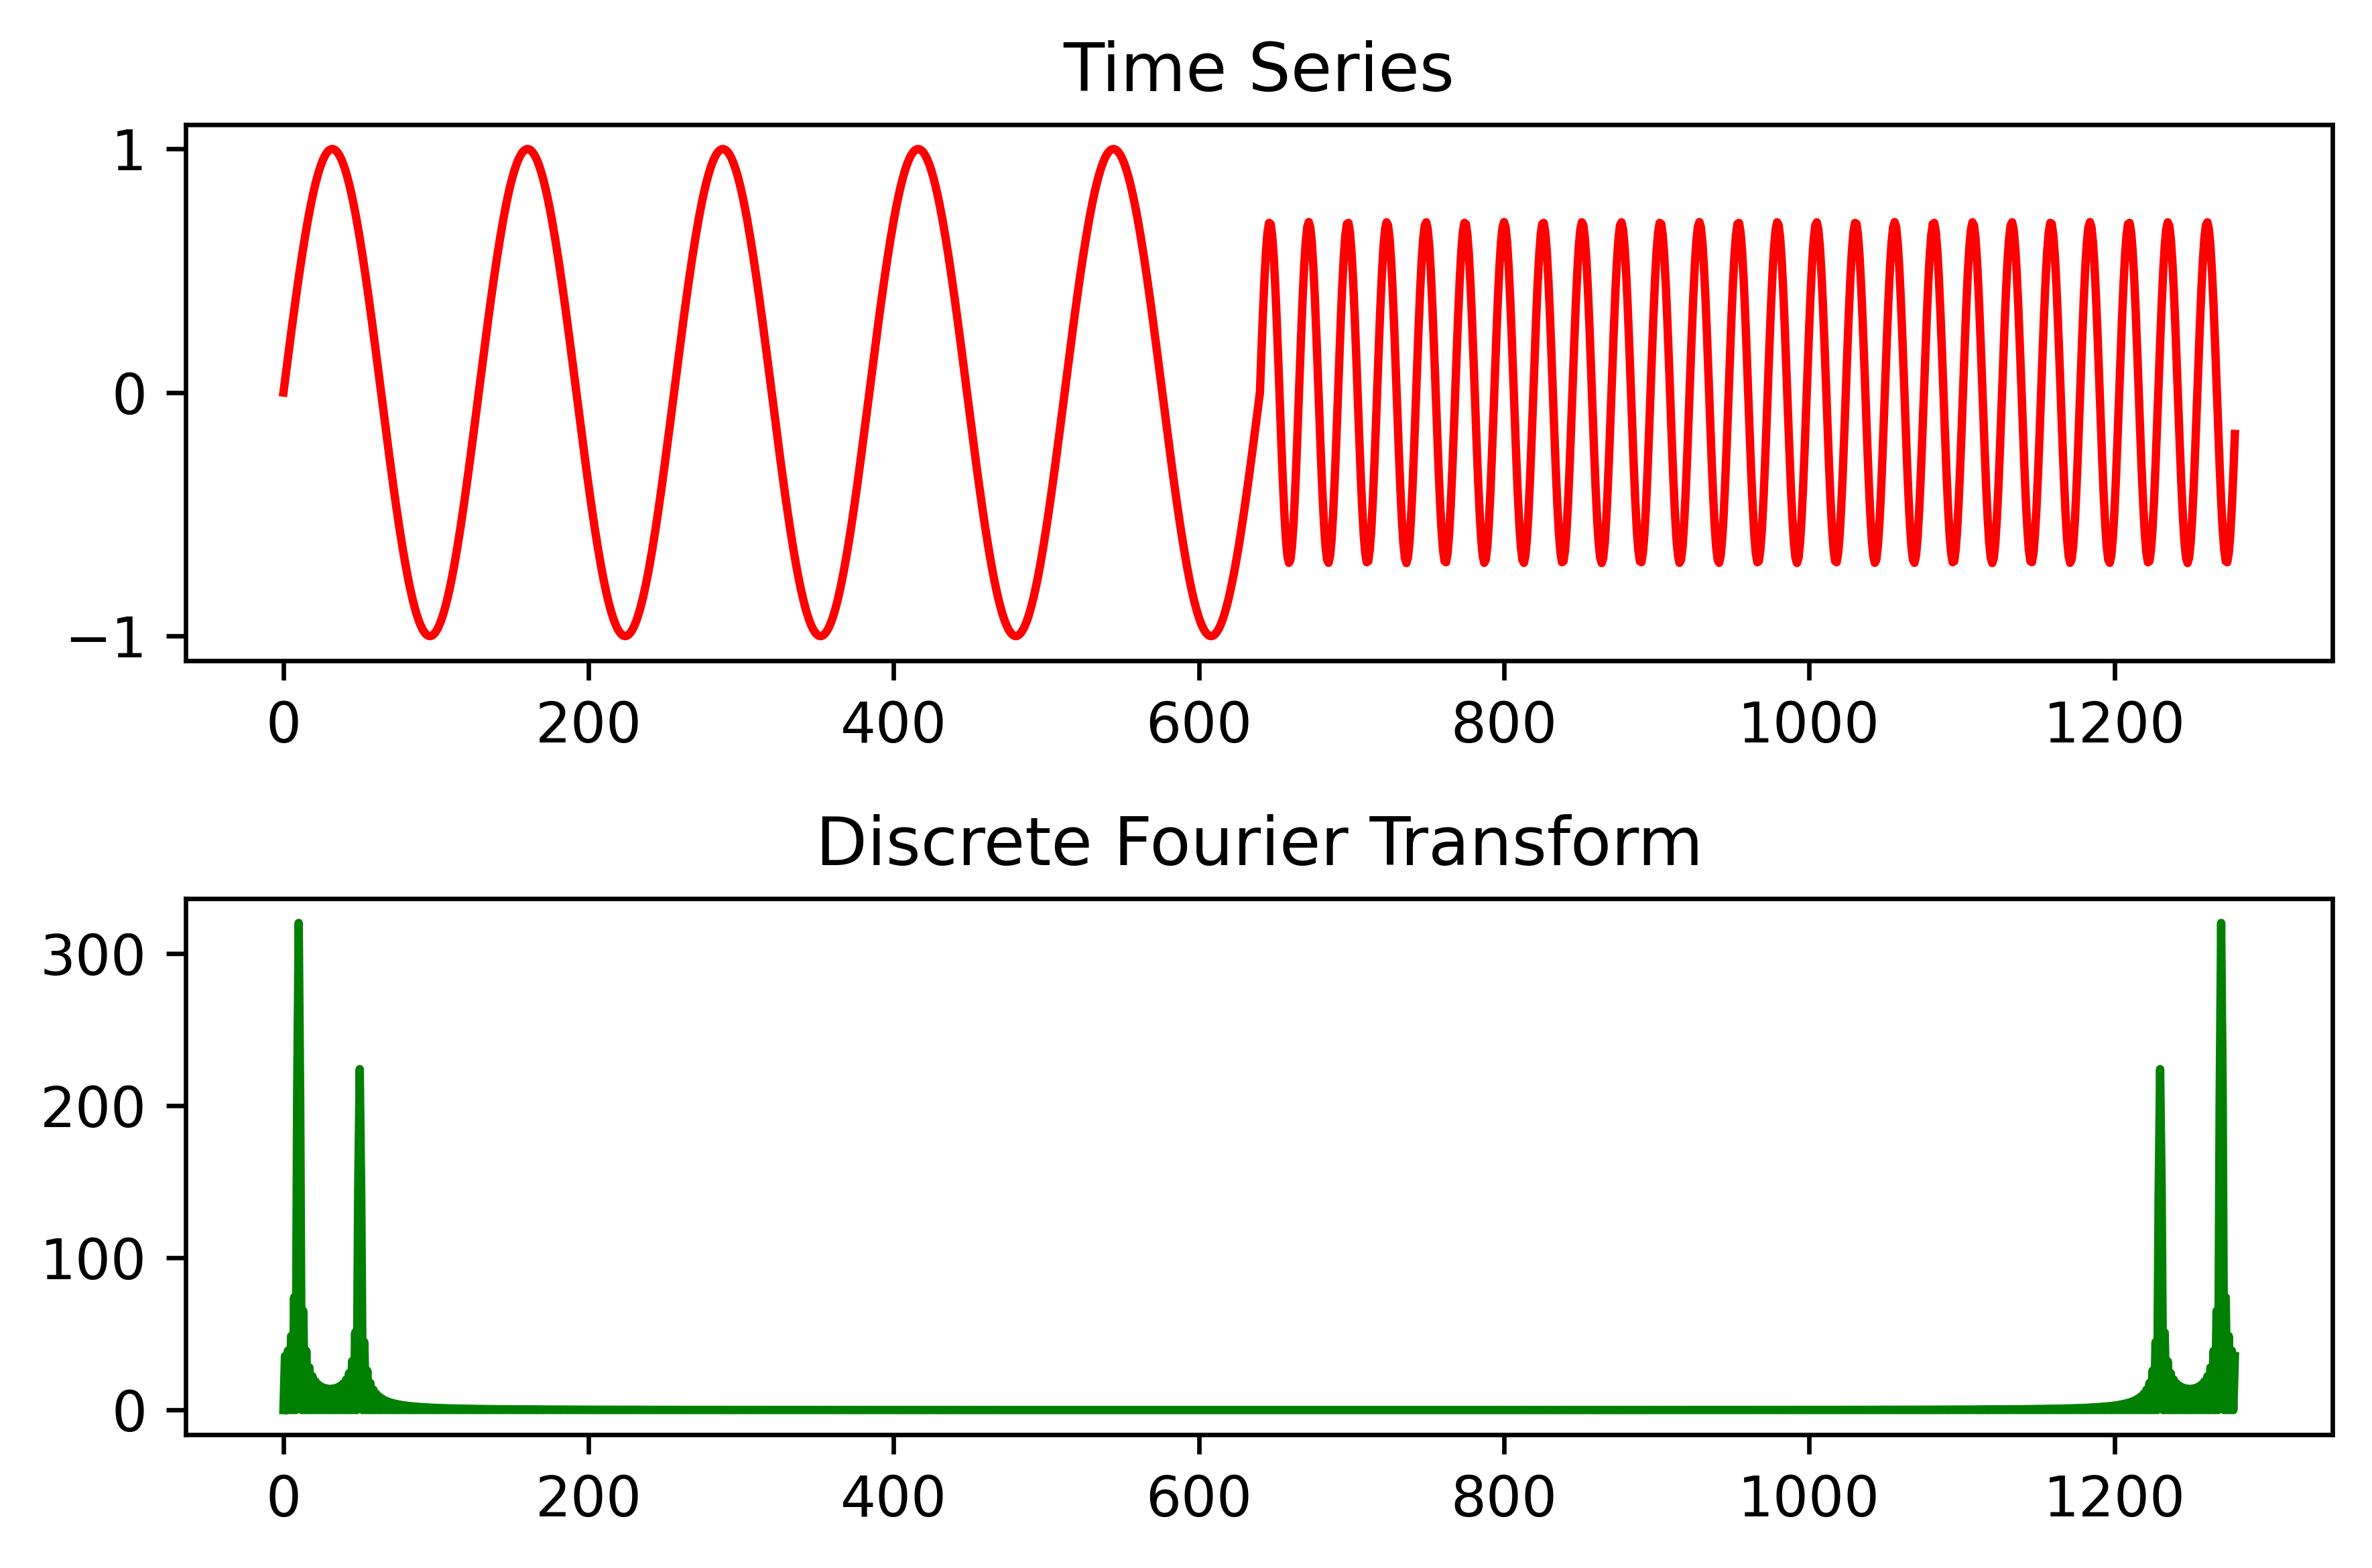

In [6]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

unflat = np.genfromtxt("timeseries.csv", delimiter=",")
flattened = unflat.flatten()

dft = np.fft.fft(flattened)

fig, (a1,a2) = plt.subplots(2,1, dpi=600)

a1.plot(flattened, c='red')
a1.set_title("Time Series")
a2.plot(np.abs(dft), c='green')
a2.set_title("Discrete Fourier Transform")

fig.tight_layout()

There are 2 predominant frequencies from the 2 peaks in the lower half of the DFT graph. These two peaks correspond to the two different frequency patterns seen in the time series graph.

### Question 4

<AxesSubplot:title={'center':'Smoothed Timeseries'}, xlabel='Date'>

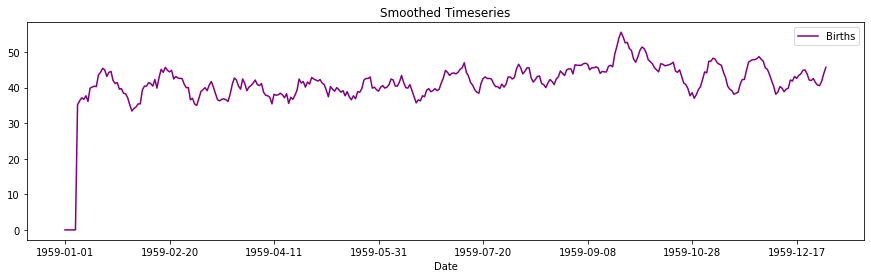

In [7]:
birth = read_csv('births.csv', header=0, index_col=0)

rolling = birth.rolling(window=7)
rolling_mean = rolling.mean()
rolling_mean = rolling_mean.replace(np.NaN, 0)

rolling_mean.plot(figsize=(15, 4), title='Smoothed Timeseries', color='purple')

#### AR Forecast

In [8]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(rolling_mean, lags=2,old_names=False)
model_fit = model.fit()

# Make prediction
yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4) # arguments denote which dataset indices to predict
print(yhat)

1960-01-01    45.380177
1960-01-02    44.960852
1960-01-03    44.590676
1960-01-04    44.271699
1960-01-05    43.997395
Freq: D, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:152: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  warnings.warn(


#### ARMA Forecast

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(rolling_mean, order=(2, 0, 2)) # p=2, q=1
model_fit = model.fit()

yhat = model_fit.predict(len(rolling_mean), len(rolling_mean)+4)
print(yhat)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


1960-01-01    45.810249
1960-01-02    45.818769
1960-01-03    45.728097
1960-01-04    45.564022
1960-01-05    45.347311
Freq: D, Name: predicted_mean, dtype: float64


### Question 5

C:\Users\STASHT~1\AppData\Local\Temp/ipykernel_9132/1388312812.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  a1.plot(K, Sum_of_squared_distances, 'bx-', c='magenta')


Text(0.5, 1.0, 'Elbow')

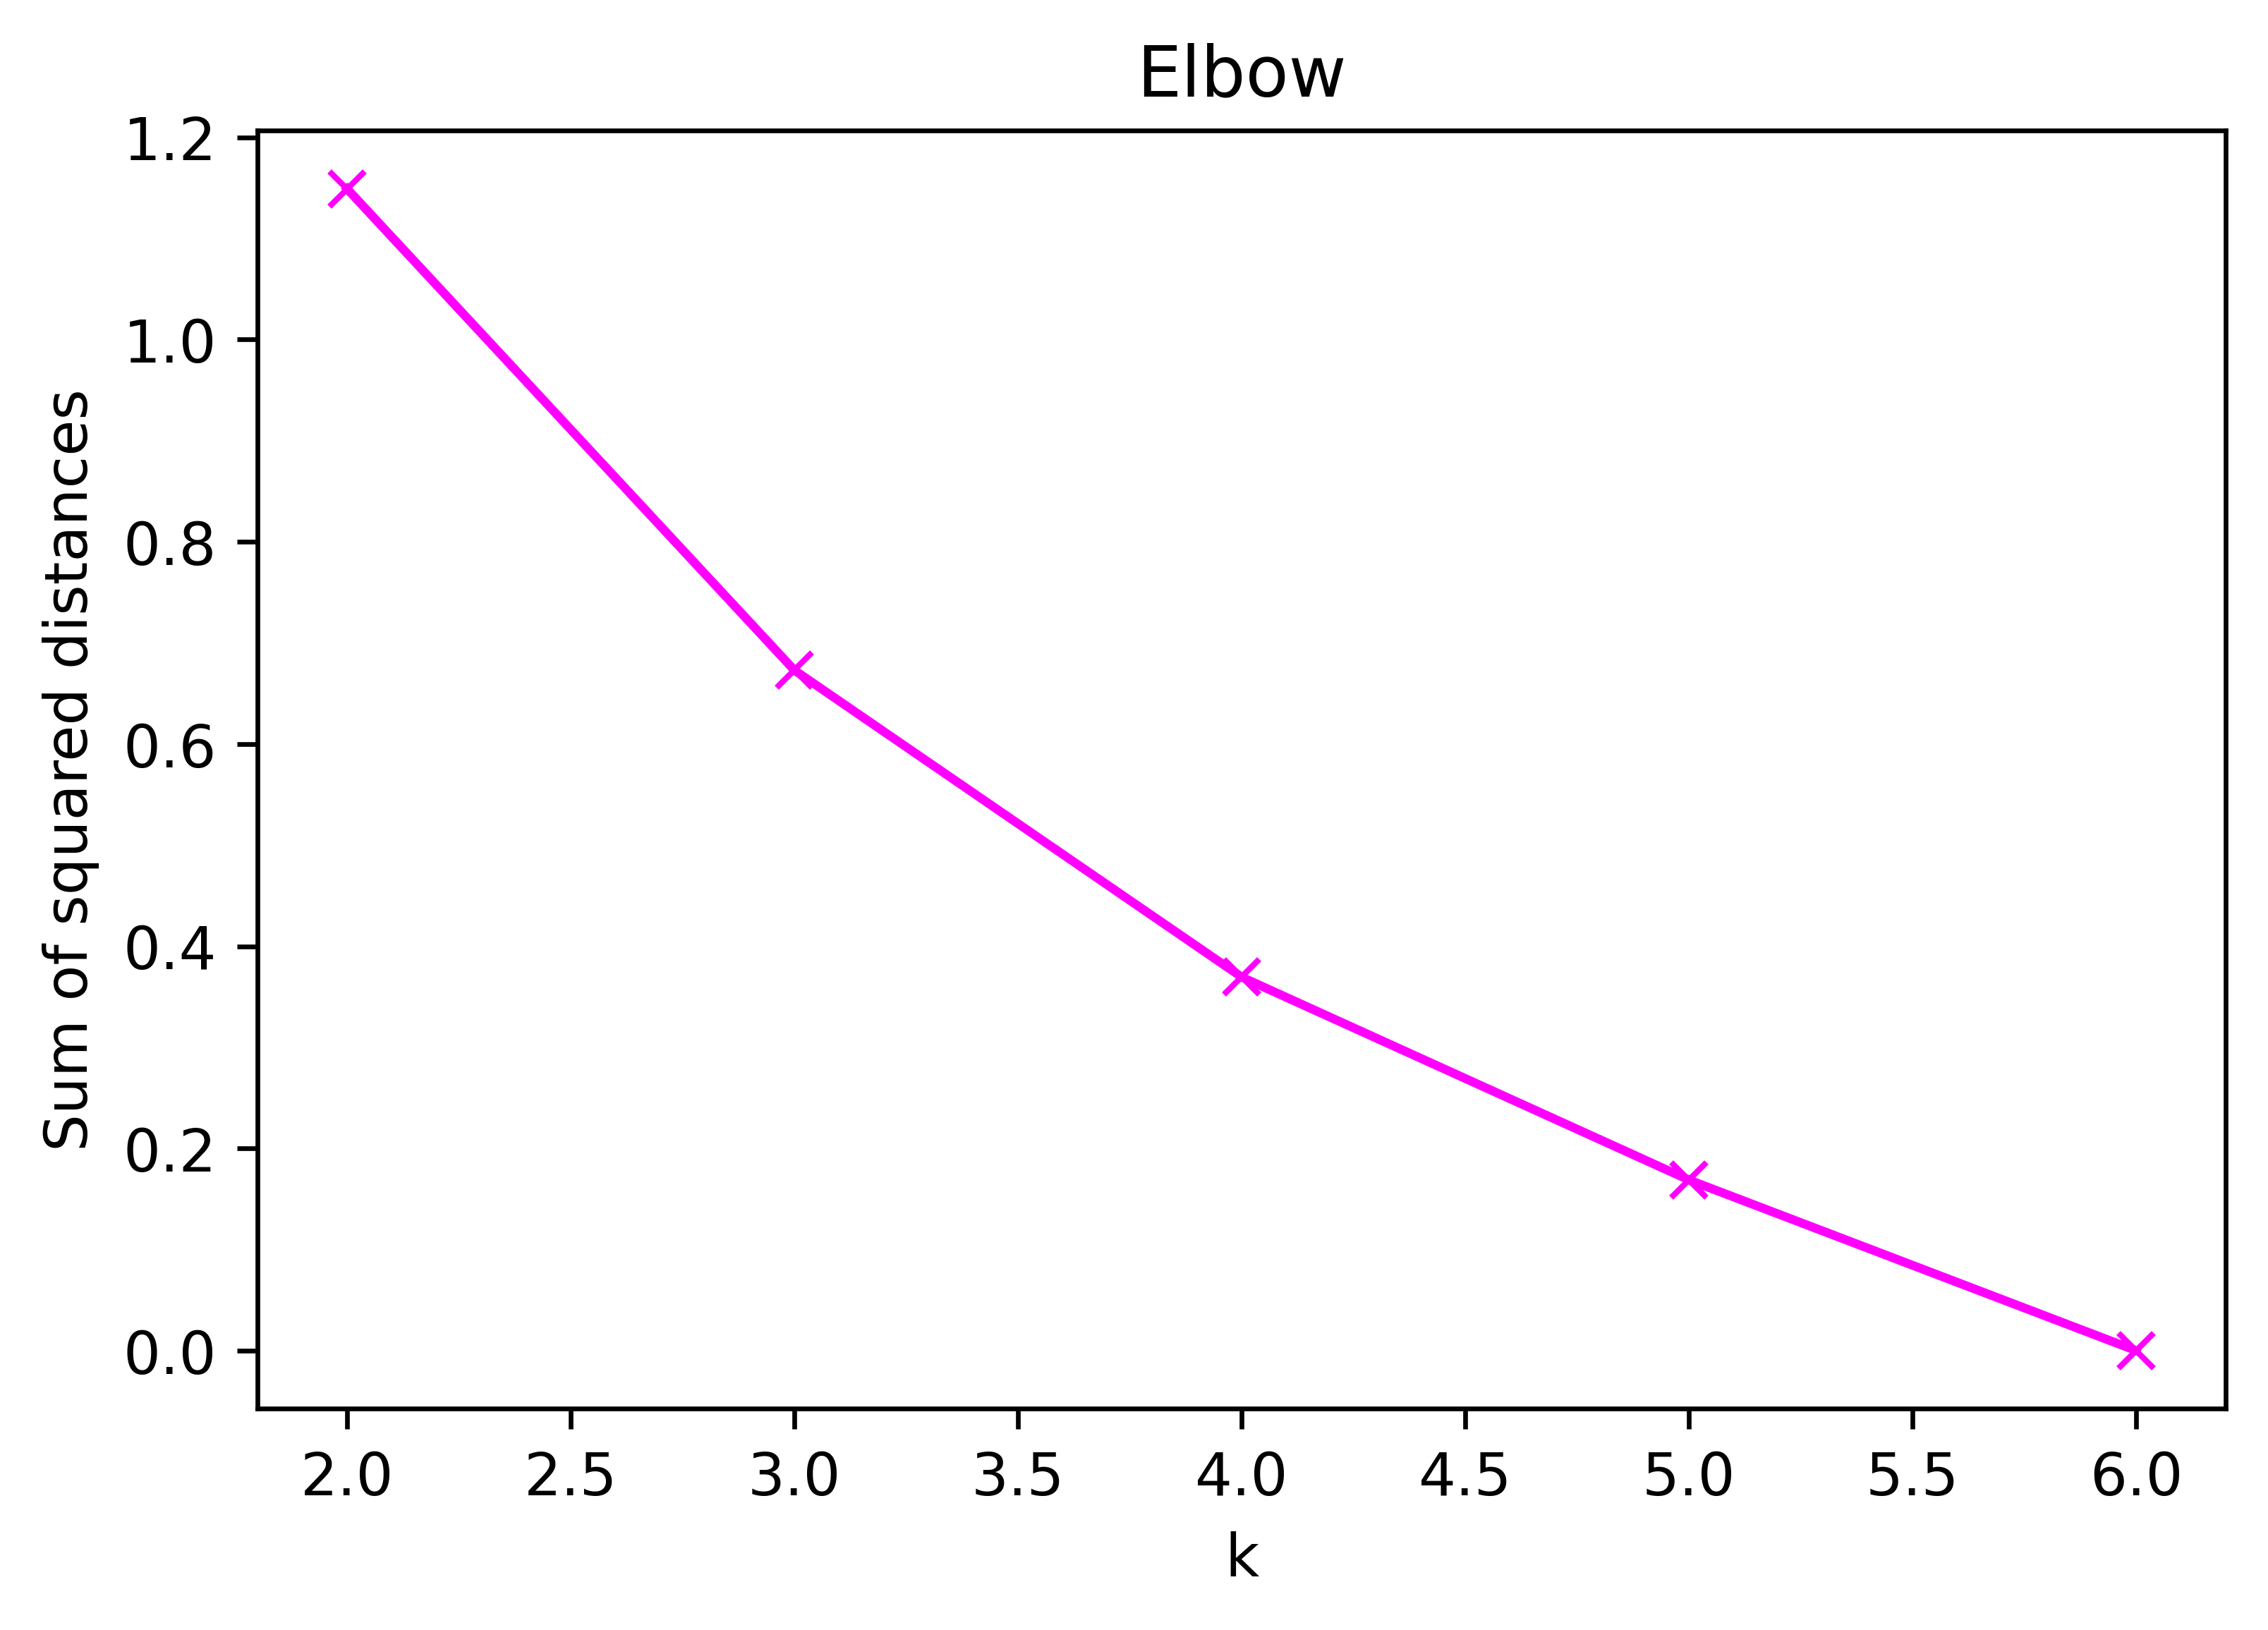

In [10]:
import pandas as pd
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

articles=['anomaly detection', 'cluster analysis', 'k-means clustering', 'data mining', 'data warehouse', 'association rule learning']
wiki_lst=[]
title=[]

for article in articles:
   #print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article,auto_suggest=False).content)
   title.append(article)

vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

Sum_of_squared_distances = []
K = range(2,7)

for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

fig, (a1) = plt.subplots(1,1, dpi=600)

a1.plot(K, Sum_of_squared_distances, 'bx-', c='magenta')
a1.set_xlabel('k')
a1.set_ylabel('Sum of squared distances')
a1.set_title('Elbow')

Small dent at 3, so number of clusters set at 3

In [11]:
# Fit k-means model with k=3
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)

labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['Title','Cluster'])
print(wiki_cl.sort_values(by=['Cluster']))

                       Title  Cluster
3                data mining        0
4             data warehouse        0
1           cluster analysis        1
2         k-means clustering        1
5  association rule learning        1
0          anomaly detection        2


Cluster, k-means and association rule are all in one cluster; data mining and warehousing are in another cluster; and anomaly detection is in a third cluster. This all makes sense, as the topics in each cluster are related more than with other clusters, and will share many of the same words.